<a href="https://colab.research.google.com/github/rohithreddy02/Hackathon/blob/master/CVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart (1) (1).csv', 'sample_data']


# Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("/content/heart (1) (1).csv")

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


About Dataset:

Age: in years
Sex: 1 = male; 0 = female

Chest pain type:

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

BP: resting blood pressure (in mm Hg on admission to the hospital)
Cholesterol : serum cholestoral in mg/dl
FBS: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

EKG results: resting electrocardiographic results

Value 0: normal

Value 1: aving ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

MAx HR: maximum heart rate achieved

Excercise angina: exercise induced angina (1 = yes; 0 = no)
Slope of ST: oldpeak = ST depression induced by exercise relative to rest
Number of vessels fluro: number of major vessels (0-3) colored by flourosopy

Thallium: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
 print("Percentage of patience without heart problems: "+str(round(dataset[dataset['target'] == 0]['target'].count()*100/303,2)))
 print("Percentage of patience with heart problems: "+str(round(dataset[dataset['target'] == 1]['target'].count()*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


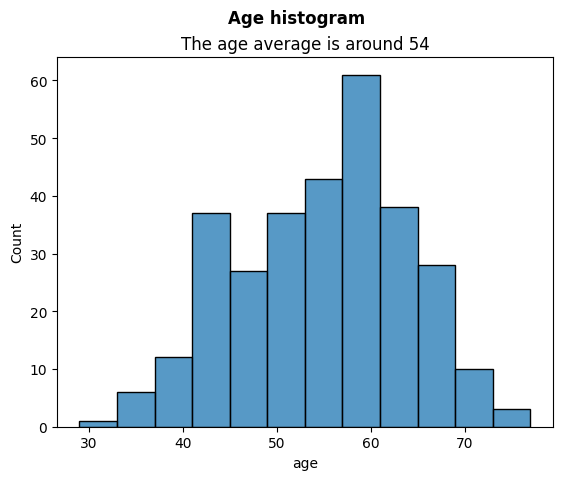

In [ ]:
plt.suptitle('Age histogram', fontweight='heavy')
plt.title('The age average is around 54')
sns.histplot(data=dataset, x='age')
plt.show()

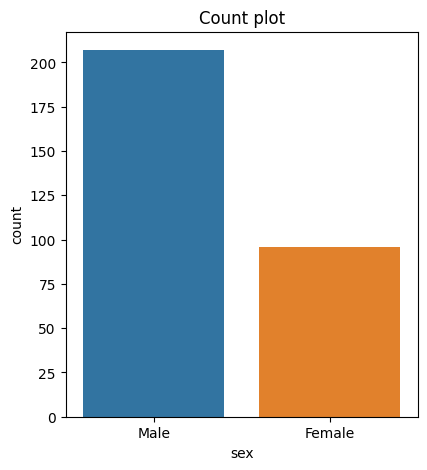

1    207
0     96
Name: sex, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [ ]:
labels = ['Male', 'Female']
order = dataset['sex'].value_counts().index
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='sex', data=dataset, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(dataset['sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")

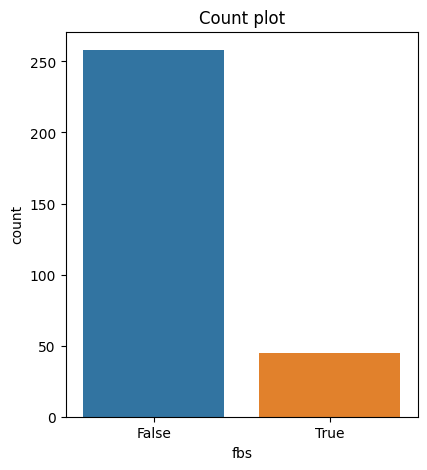

0    258
1     45
Name: fbs, dtype: int64

In [ ]:
labels = ["False", 'True']
order = dataset['fbs'].value_counts().index

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='fbs', data=dataset, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

dataset['fbs'].value_counts()

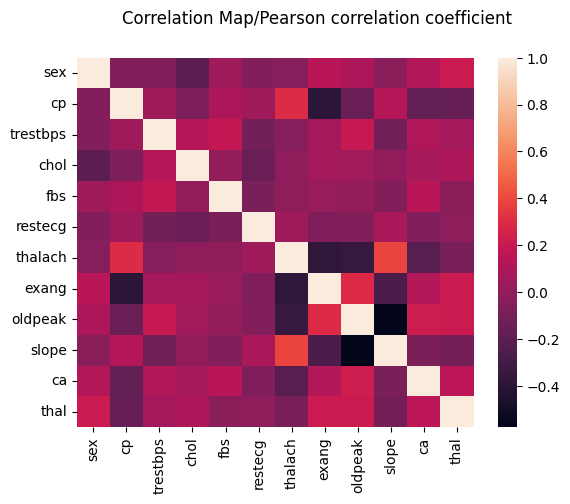

In [ ]:
plt.suptitle("Correlation Map/Pearson correlation coefficient")
sns.heatmap(dataset.iloc[:,1:-1].corr())

plt.show()

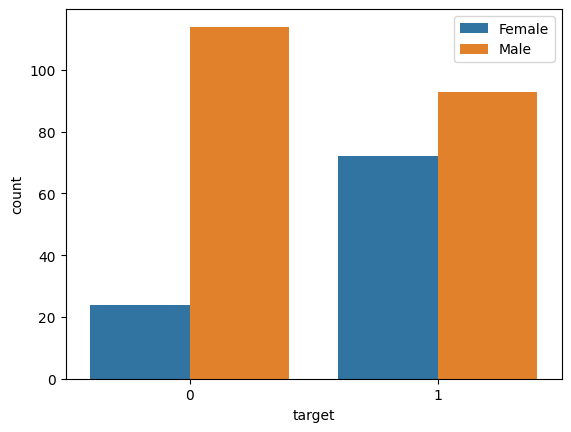

In [ ]:
ax = sns.countplot(x='target', hue='sex', data=dataset)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()

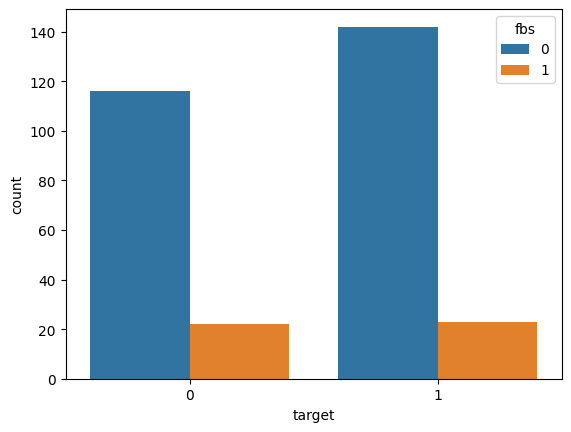

In [ ]:
ax = sns.countplot(x='target', hue='fbs', data=dataset)
plt.show()

# Model training

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
from sklearn.metrics import confusion_matrix

# Obtain the confusion matrix
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

# Justify the accuracy score
true_positive = cm_lr[1, 1]
true_negative = cm_lr[0, 0]
false_positive = cm_lr[0, 1]
false_negative = cm_lr[1, 0]

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm_lr)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))


Confusion Matrix:
[[22  5]
 [ 4 30]]
Accuracy: 85.25%
Precision: 0.86
Recall: 0.88
F1 Score: 0.87


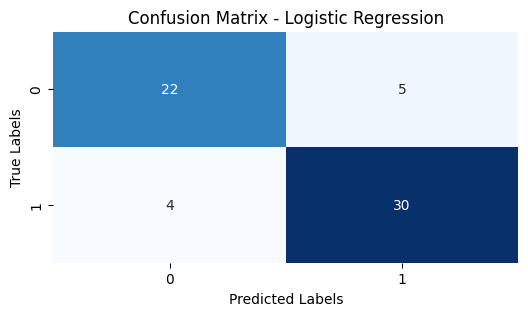

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [ ]:
from sklearn.metrics import confusion_matrix

# Obtain the confusion matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)

# Justify the accuracy score
true_positive = cm_knn[1, 1]
true_negative = cm_knn[0, 0]
false_positive = cm_knn[0, 1]
false_negative = cm_knn[1, 0]

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm_lr)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))


Confusion Matrix:
[[22  5]
 [ 4 30]]
Accuracy: 67.21%
Precision: 0.72
Recall: 0.68
F1 Score: 0.70


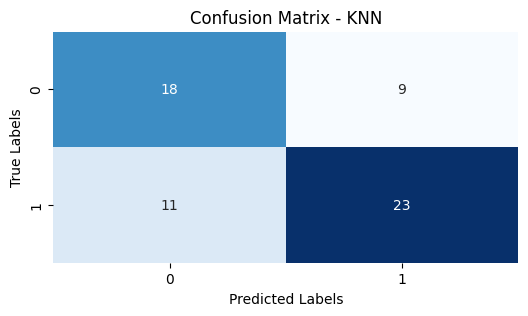

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


In [ ]:
from sklearn.metrics import confusion_matrix

# Obtain the confusion matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

# Justify the accuracy score
true_positive = cm_dt[1, 1]
true_negative = cm_dt[0, 0]
false_positive = cm_dt[0, 1]
false_negative = cm_dt[1, 0]

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm_dt)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))


Confusion Matrix:
[[22  5]
 [ 8 26]]
Accuracy: 78.69%
Precision: 0.84
Recall: 0.76
F1 Score: 0.80


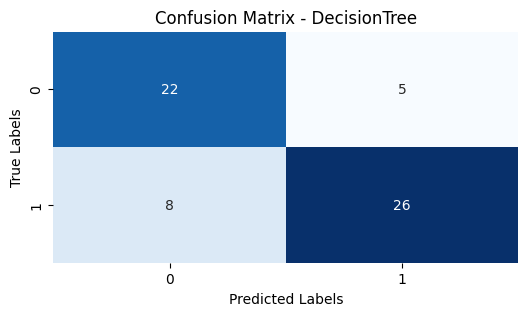

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - DecisionTree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


In [ ]:
from sklearn.metrics import confusion_matrix

# Obtain the confusion matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

# Justify the accuracy score
true_positive = cm_rf[1, 1]
true_negative = cm_rf[0, 0]
false_positive = cm_rf[0, 1]
false_negative = cm_rf[1, 0]

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm_rf)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))


Confusion Matrix:
[[24  3]
 [ 4 30]]
Accuracy: 88.52%
Precision: 0.91
Recall: 0.88
F1 Score: 0.90


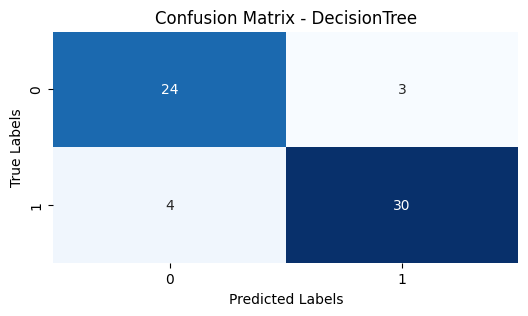

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - DecisionTree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
data = {'Machine Learning Models':[
                      'Logistic Regression',
                      'K-Nearest Neighbor',
                      'Decision Tree',
                      'Random Forest'

                      ],
        "Accuracy":[score_lr,
                    score_knn,
                    score_dt,
                    score_rf
                    ]
        }

data = pd.DataFrame(data)
data

,Machine Learning Models,Accuracy
0,Logistic Regression,85.25
1,K-Nearest Neighbor,67.21
2,Decision Tree,78.69
3,Random Forest,88.52
